In [1]:
!pip install -q  torch bitsandbytes==0.41.3 trl==0.4.7 accelerate
!pip install git+https://github.com/huggingface/transformers.git git+https://github.com/huggingface/peft.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-pxpi7ex2
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-pxpi7ex2
  Resolved https://github.com/huggingface/transformers.git to commit 1ea3ad1aeca1ffc1726d8a4fab2e4393a72be56f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.39.0.dev0', '0.27.2')

In [5]:
from transformers.utils import send_example_telemetry

send_example_telemetry("language_modeling_from_scratch_notebook", framework="pytorch")

In [6]:
from datasets import load_dataset

In [7]:
import pandas as pd

import random

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/dataset_cleaned.csv')

# Randomly select 50 rows from the DataFrame
selected_rows = df.sample(50)

# Write the selected rows to a new CSV file
selected_rows.to_csv('/content/dataset_cleaned_val.csv', index=False)
# Get the indices of the randomly sampled rows
sampled_indices = selected_rows.index.tolist()

# Drop the sampled rows from the original DataFrame
df_no_sampled = df.drop(sampled_indices)

# Write the updated DataFrame to a new CSV file
df_no_sampled.to_csv('/content/dataset_cleaned_val_no_sampled.csv', index=False)

In [8]:
datasets = load_dataset("csv", data_files={"train": '/content/dataset_cleaned_val_no_sampled.csv',"val": '/content/dataset_cleaned_val.csv'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

In [9]:
from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [10]:
model_checkpoint = "mistralai/Mistral-7B-v0.1"
tokenizer_checkpoint = "mistralai/Mistral-7B-v0.1"

In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(tokenizer_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [12]:
def tokenize_function(examples):
    return tokenizer(examples["Title"])

In [13]:
tokenized_datasets = datasets.map(tokenize_function, batched=True, num_proc=4, remove_columns=["Title"])

Map (num_proc=4):   0%|          | 0/668 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/50 [00:00<?, ? examples/s]

In [14]:
tokenized_datasets["train"][1]

{'input_ids': [1,
  19712,
  28705,
  28740,
  28731,
  12710,
  13964,
  28721,
  1116,
  1024,
  11864,
  304,
  6288,
  288,
  264,
  1178,
  11200,
  28723,
  19712,
  28705,
  28750,
  28731,
  2530,
  6288,
  288,
  11200,
  13964,
  28721,
  1116,
  927,
  298,
  347,
  2662,
  325,
  13444,
  10336,
  28731],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [15]:
block_size = 128
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
        # customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [16]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=10,
    num_proc=4,
)

Map (num_proc=4):   0%|          | 0/668 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/50 [00:00<?, ? examples/s]

In [17]:
from transformers import AutoConfig, AutoModelForCausalLM, BitsAndBytesConfig
import torch

# Quantization Config
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

# config = AutoConfig.from_pretrained(model_checkpoint)
model = AutoModelForCausalLM.from_pretrained(model_checkpoint,
                                             quantization_config=quant_config,
                                             torch_dtype=torch.bfloat16,
                                              device_map={"": 0})
model.config.use_cache = False
model.config.pretraining_tp = 1

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [21]:
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(
    f"Mistral-7b-CN",
    evaluation_strategy = "steps",
    max_steps=200,
    logging_steps=10,
    learning_rate=2e-4,
    weight_decay=0.01,
    push_to_hub=False
)

In [22]:
from peft import LoraConfig
peft_parameters = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=8,
    bias="none",
    task_type="CAUSAL_LM"
)


In [24]:
model.add_adapter(peft_parameters,adapter_name="custom_adapter")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["val"],
)

In [25]:
trainer.train()

Step,Training Loss,Validation Loss
10,2.436400,2.796160
20,2.222200,2.404056
30,2.107900,2.280622
40,2.161300,2.234162
50,1.985100,2.215019
60,1.978800,2.197215
70,1.957000,2.192743
80,1.855100,2.184549
90,1.650100,2.186626
100,1.815100,2.181986


TrainOutput(global_step=200, training_loss=1.8367903423309326, metrics={'train_runtime': 3175.9152, 'train_samples_per_second': 0.504, 'train_steps_per_second': 0.063, 'total_flos': 8592900111728640.0, 'train_loss': 1.8367903423309326, 'epoch': 4.76})

In [29]:
from transformers import TextStreamer

output_tokens = []

def stream():
    # query= '''Assuming a network with a maximum segment size (MSS) of 276 bytes, a round trip time (RTT) of 2300 milliseconds, and a packet loss rate of 0.01, determine the TCP throughput of this network.'''
    prompt = f"Explain the setup, data transfer and tear-down phases"

    inputs = tokenizer([prompt], return_tensors="pt").to("cuda:0")
    streamer = TextStreamer(tokenizer)

    for _ in trainer.model.generate(**inputs, streamer=streamer, max_new_tokens=300):
       output_tokens.append(_.cpu().numpy())
    # Decode generated tokens into text
    output_text = tokenizer.decode(output_tokens[0])
    return output_text

In [26]:
tdf = pd.DataFrame(trainer.state.log_history)

csv_filename = "pretraining_history_mistral.csv"
tdf.to_csv(csv_filename,index=False)

In [28]:
trainer.model.save_pretrained("mistral-temp")

/usr/local/lib/python3.10/dist-packages/transformers/integrations/peft.py:391: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(


In [30]:
stream()

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> Explain the setup, data transfer and tear-down phases of the TCP/IP model.<s> The TCP/IP model is a reference model that defines the functions and protocols of the Internet Protocol Suite. It consists of four layers:<s> The setup phase involves establishing a connection between two devices and negotiating the parameters of the connection, such as the type of data encoding and the speed of data transfer. The data transfer phase involves sending and receiving data over the established connection. The tear-down phase involves terminating the connection and releasing the resources used by the devices.<s> The TCP/IP model is used to design and implement network protocols and applications that use the Internet Protocol Suite. It provides a framework for understanding how data is transferred over a network and how different protocols work together to achieve this.<s> The TCP/IP model is a reference model that defines the functions and protocols of the Internet Protocol Suite. It consists 

'<s> Explain the setup, data transfer and tear-down phases of the TCP/IP model.<s> The TCP/IP model is a reference model that defines the functions and protocols of the Internet Protocol Suite. It consists of four layers:<s> The setup phase involves establishing a connection between two devices and negotiating the parameters of the connection, such as the type of data encoding and the speed of data transfer. The data transfer phase involves sending and receiving data over the established connection. The tear-down phase involves terminating the connection and releasing the resources used by the devices.<s> The TCP/IP model is used to design and implement network protocols and applications that use the Internet Protocol Suite. It provides a framework for understanding how data is transferred over a network and how different protocols work together to achieve this.<s> The TCP/IP model is a reference model that defines the functions and protocols of the Internet Protocol Suite. It consists

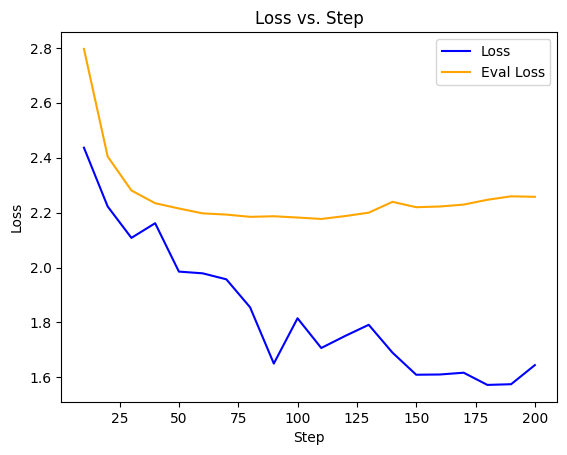

In [48]:
import matplotlib.pyplot as plt
import numpy as np
loss_values = np.array(tdf.loc[:38:2, 'loss'].values)
eval_loss_values = np.array(tdf.loc[1:42:2, 'eval_loss'].values)
steps = np.array(tdf.loc[:38:2, 'step'].values)

# Plot the data
plt.plot(steps, loss_values, color='blue', label='Loss')
plt.plot(steps, eval_loss_values,color='orange', label='Eval Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.savefig('Mistral PreTraining History')
plt.title('Loss vs. Step')
plt.legend()
plt.show()

In [49]:
import math
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 9.56
